In [ ]:
#import dependencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#loading HR data
hr_df = pd.read_csv('https://raw.githubusercontent.com/pydeveloperashish/Predicting-which-of-your-Employee-will-Quit-your-Company-Data-Science-Project/master/hr_data.csv')


In [ ]:
#employee dataset
from google.colab import files
em_df = files.upload()

Saving employee_satisfaction_evaluation (1).xlsx to employee_satisfaction_evaluation (1) (1).xlsx


In [ ]:
em_df = pd.read_excel('employee_satisfaction_evaluation (1).xlsx')

In [ ]:
54/em_df.size  #amount of missing data

0.0012000800053336889

In [ ]:
%%timeit
final_df = pd.merge(hr_df,em_df,left_index=True,right_index=True) #time taken by merge method


838 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#%%timeit
#final_df = hr_df.set_index('employee_id').join(em_df.set_index('EMPLOYEE #')) #time taken by join method


In [ ]:
final_df = pd.merge(hr_df,em_df,left_index=True,right_index=True) #merging datasets
final_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,1003,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,1005,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,1486,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,1038,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,1057,0.37,0.52


In [ ]:
final_df.drop('EMPLOYEE #',axis=1,inplace=True) #dropping duplicate column after merging 'on' column

In [ ]:
final_df.shape

(14999, 11)

In [ ]:
final_df.isna().sum() #checking missing values

,0
employee_id,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0
satisfaction_level,27


<ipython-input-49-90a0940e5594>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='left',y='department',data=final_df,hue='salary',kind='bar',ci=None)


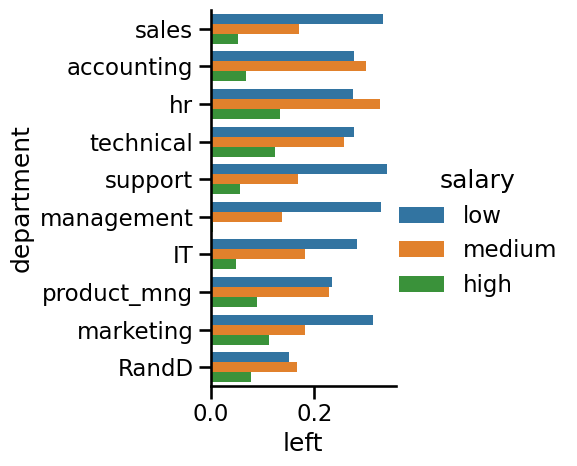

In [ ]:


sns.set_context('talk')
sns.catplot(x='left',y='department',data=final_df,hue='salary',kind='bar',ci=None)
#plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'low'),
  Text(1, 0, 'medium'),
  Text(2, 0, 'high'),
  Text(3, 0, 'sales'),
  Text(4, 0, 'accounting'),
  Text(5, 0, 'hr'),
  Text(6, 0, 'technical'),
  Text(7, 0, 'support'),
  Text(8, 0, 'management'),
  Text(9, 0, 'IT'),
  Text(10, 0, 'product_mng'),
  Text(11, 0, 'marketing'),
  Text(12, 0, 'RandD')])

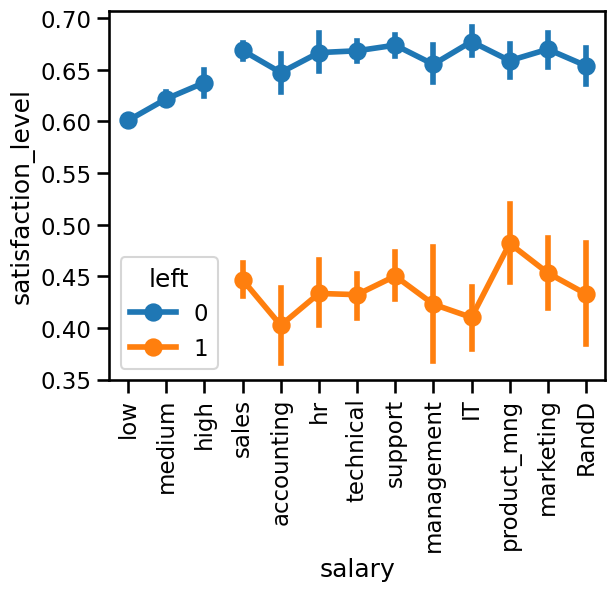

In [ ]:


sns.pointplot(x='salary',y='satisfaction_level',data=final_df) #on an average employees having low salary had low satisfaction level
sns.pointplot(x='department',y='satisfaction_level',data=final_df,hue='left') #accounting deptt  employees who left had the least satisfaction level
plt.xticks(rotation=90)

promotion_last_5years      0    1
left                             
0                      11128  300
1                       3552   19


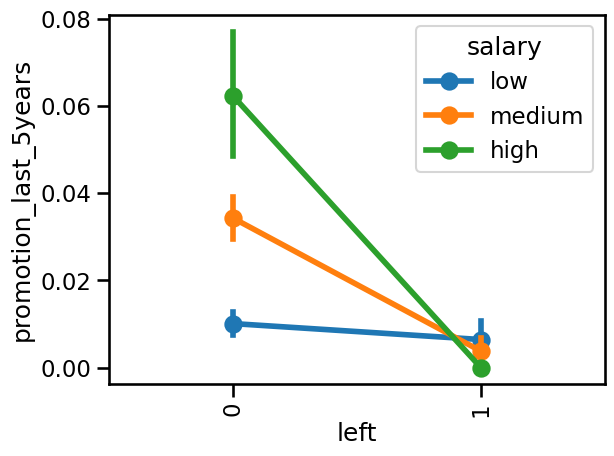

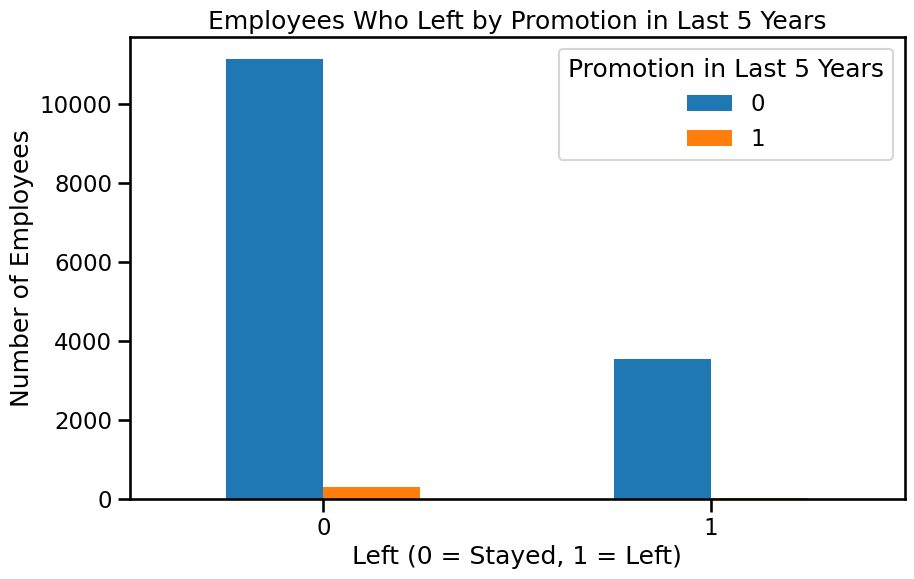

In [ ]:
sns.pointplot(x='left',y='promotion_last_5years',data=final_df,hue='salary')
plt.xticks(rotation=90)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

promotion_left = final_df.groupby(['left', 'promotion_last_5years']).size().unstack(fill_value=0)

# Display the results
print(promotion_left)

# Create a bar plot
promotion_left.plot(kind='bar', figsize=(10, 6))
plt.title('Employees Who Left by Promotion in Last 5 Years')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Promotion in Last 5 Years')
plt.show()


In [ ]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
labels = ['salary','department']
le = LabelEncoder()
for i in labels:
    final_df[i] = le.fit_transform(final_df[i])


In [ ]:
#splitting dataset to perform on test data
X = final_df.drop(['left'],axis=1)
y = final_df['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43,test_size=0.3)

In [ ]:
#Making Pipeline steps to be fed to pipeline
steps_logreg = [('scaler',StandardScaler()),('logreg',LogisticRegression())]
steps_rf = [('scaler',StandardScaler()),('rf',RandomForestClassifier())]
steps_knn = [('scaler',StandardScaler()),('knn',KNeighborsClassifier())]
steps_dt = [('scaler',StandardScaler()),('dt',DecisionTreeClassifier())]

steps = [steps_logreg,steps_rf,steps_knn,steps_dt]


In [ ]:
acc_dict = {} #dictionary to store accuracy values

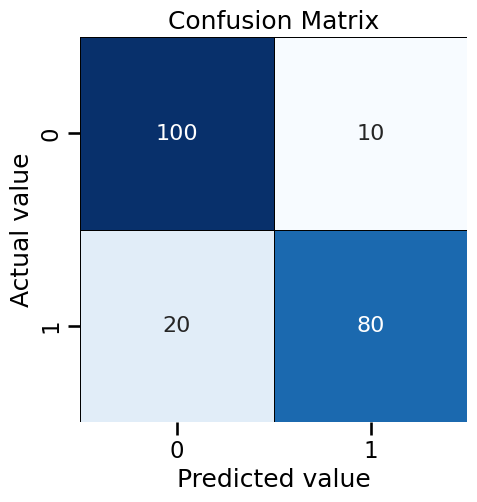

In [ ]:


import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(cm):
    plt.figure(figsize=(5, 5)) # Set the figure size
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                linewidths=0.5, linecolor='black', annot_kws={"size": 16}) # Customize appearance
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual value")
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm)

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer




def preprocess_data(df):
    # Convert 'salary' and 'department' columns to numerical representations
    try:
        df['salary'] = pd.factorize(df['salary'])[0]
        df['department'] = pd.factorize(df['department'])[0]
    except TypeError:
        pass

    labels = ['salary', 'department']
    le = LabelEncoder()
    for i in labels:
        try:
          df[i] = le.fit_transform(df[i].astype(str))
        except:
          print(f"Could not encode column {i} due to error. Check data type.")

    return df

final_df = preprocess_data(final_df)

# Splitting the dataset
X = final_df.drop(['left'], axis=1)
y = final_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.3)

# Define models and steps
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
steps = [('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]

# Create and evaluate pipelines
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps + [(name, model)])  #Append the model to the pipeline
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy}")
    print(results[name]['classification_report'])
# ... (Your existing code for plotting the results)

Logistic Regression Accuracy: 0.7906666666666666
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3422
           1       0.61      0.35      0.45      1078

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

Random Forest Accuracy: 0.9813333333333333
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3422
           1       0.98      0.94      0.96      1078

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

KNN Accuracy: 0.9526666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3422
           1       0.90      0.90      0.90      1078

    accuracy                           0.95      4500
   

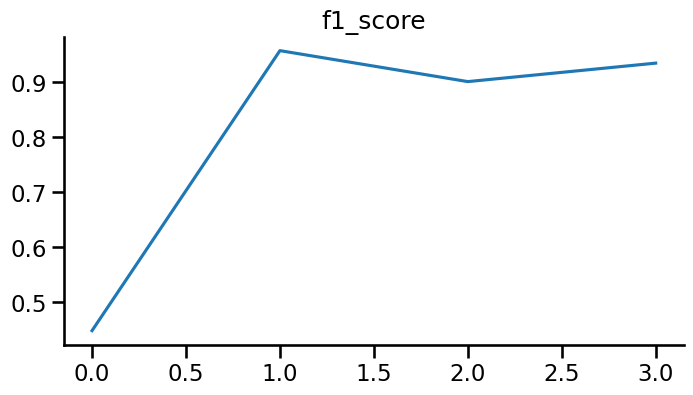

In [ ]:
from matplotlib import pyplot as plt
_df_12['f1_score'].plot(kind='line', figsize=(8, 4), title='f1_score')
plt.gca().spines[['top', 'right']].set_visible(False)

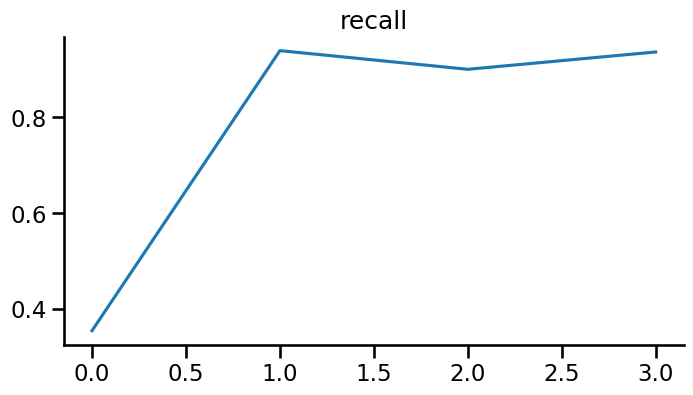

In [ ]:
from matplotlib import pyplot as plt
_df_11['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

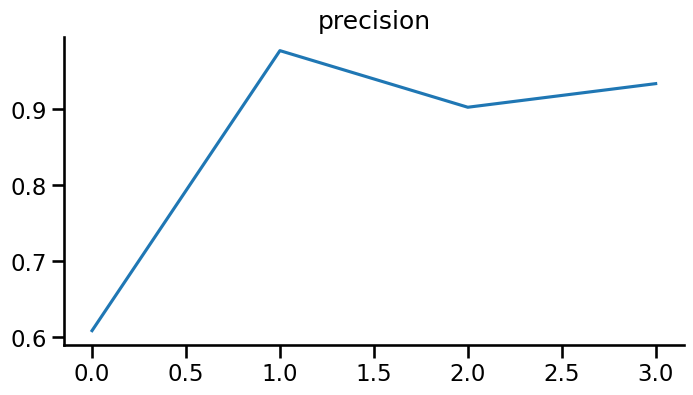

In [ ]:
from matplotlib import pyplot as plt
_df_10['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

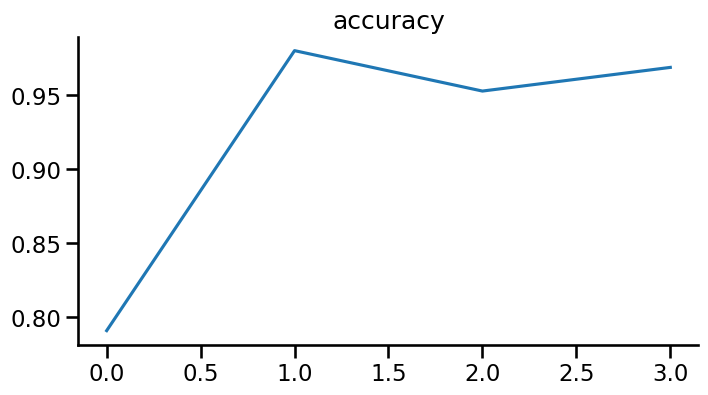

In [ ]:
from matplotlib import pyplot as plt
_df_9['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

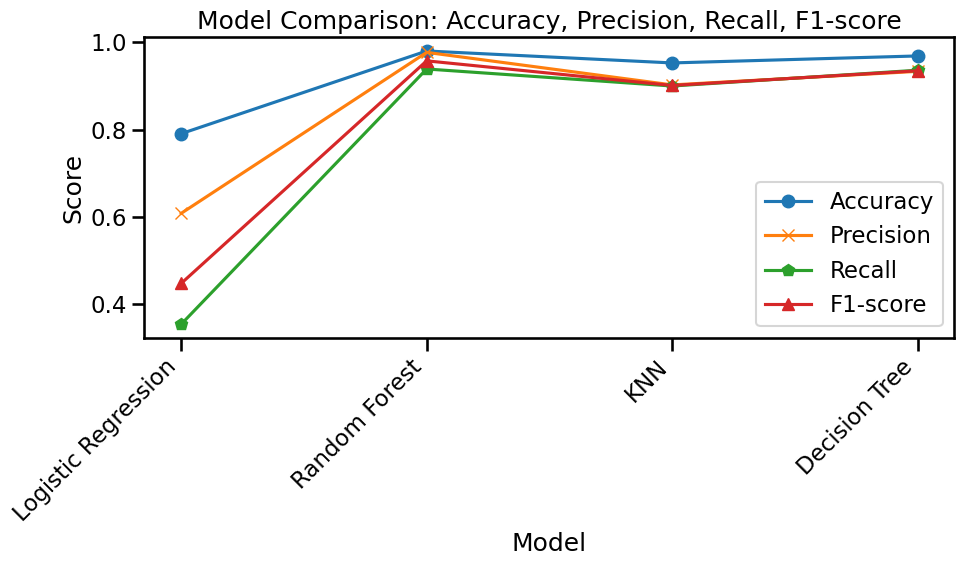

In [ ]:


import matplotlib.pyplot as plt


# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['accuracy'], label='Accuracy', marker='o')
plt.plot(results_df.index, results_df['precision'], label='Precision', marker='x')
plt.plot(results_df.index, results_df['recall'], label='Recall', marker='p')
plt.plot(results_df.index, results_df['f1_score'], label='F1-score', marker='^')

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-score")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()